In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sb.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('weatherAUS_Train_Set.csv')

df = pd.DataFrame(df)

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10812,1/18/2014,CoffsHarbour,17.6,28.3,0.0,8.0,NaN,NE,43.0,N,...,52.0,53.0,1015.1,1012.5,0.0,0.0,26.5,27.5,No,No
10813,1/19/2014,CoffsHarbour,18.8,28.1,0.0,8.0,NaN,NNE,43.0,N,...,57.0,57.0,1009.9,1006.4,1.0,1.0,25.9,27.1,No,No
10814,1/20/2014,CoffsHarbour,18.2,28.2,0.0,7.2,NaN,NE,46.0,S,...,65.0,63.0,1009.4,1006.5,1.0,3.0,25.1,27.7,No,No
10815,1/21/2014,CoffsHarbour,21.3,28.5,0.0,6.2,11.2,NE,52.0,NE,...,78.0,73.0,1007.9,1004.2,2.0,2.0,25.9,27.6,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817 entries, 0 to 10816
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10817 non-null  object 
 1   Location       10817 non-null  object 
 2   MinTemp        10763 non-null  float64
 3   MaxTemp        10772 non-null  float64
 4   Rainfall       10682 non-null  float64
 5   Evaporation    4363 non-null   float64
 6   Sunshine       2006 non-null   float64
 7   WindGustDir    10630 non-null  object 
 8   WindGustSpeed  10630 non-null  float64
 9   WindDir9am     9792 non-null   object 
 10  WindDir3pm     10663 non-null  object 
 11  WindSpeed9am   10737 non-null  float64
 12  WindSpeed3pm   10741 non-null  float64
 13  Humidity9am    10623 non-null  float64
 14  Humidity3pm    10617 non-null  float64
 15  Pressure9am    10606 non-null  float64
 16  Pressure3pm    10602 non-null  float64
 17  Cloud9am       5662 non-null   float64
 18  Cloud3

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,10763.000000,10772.000000,10682.000000,4363.000000,2006.000000,10630.000000,10737.000000,10741.000000,10623.000000,10617.000000,10606.000000,10602.000000,5662.000000,5863.000000,10756.000000,10753.000000
mean,11.754083,24.094281,2.355467,5.631286,7.720140,35.250047,11.160380,15.608416,68.583074,47.304700,1018.211418,1015.562234,4.200459,4.332253,16.933693,22.685855
std,6.248327,6.975374,9.590117,4.738839,3.773557,12.584898,7.530352,7.762831,20.167918,21.001743,6.811687,6.698680,3.078995,2.852653,6.115099,6.756884
min,-3.000000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,5.000000,1.000000,989.800000,982.900000,0.000000,0.000000,0.300000,6.400000
25%,6.700000,18.700000,0.000000,2.600000,5.100000,26.000000,6.000000,9.000000,55.000000,32.000000,1013.500000,1010.900000,1.000000,1.000000,12.300000,17.500000
50%,11.700000,23.600000,0.000000,4.400000,8.900000,33.000000,9.000000,15.000000,70.000000,46.000000,1018.200000,1015.500000,5.000000,5.000000,17.200000,22.100000
75%,16.800000,28.900000,0.400000,7.400000,10.600000,43.000000,17.000000,20.000000,84.000000,61.000000,1022.800000,1020.100000,7.000000,7.000000,21.400000,27.200000
max,29.700000,46.600000,371.000000,86.200000,13.800000,107.000000,48.000000,56.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,45.200000


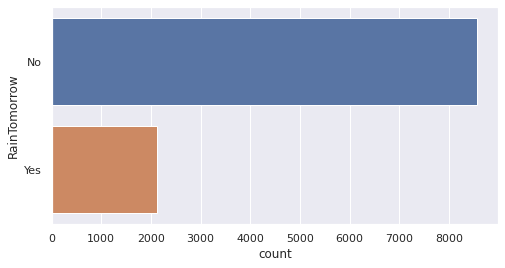

No     79.153185
Yes    19.589535
Name: RainTomorrow, dtype: float64

In [ ]:
# Lets explore the distribution of Y and N in the y variable.

f, ax = plt.subplots(figsize=(8, 4))
ax = sb.countplot(y="RainTomorrow", data=df)
plt.show()
# Percentage between y and N
(df['RainTomorrow'].value_counts()/len(df))*100

In [ ]:
#extracting the yaer, day and date from date variable


df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day



In [ ]:
#now the date column can be droped
df.drop('Date', axis =1, inplace=True)


In [ ]:
#categorical variables in the dataset
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
for i in categorical:
  print(df[i].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
['No' 'Yes' nan]
['No' 'Yes' nan]


In [ ]:

#Null Value count in categorical variables
for i in categorical:
  print(df[i].isnull().sum
        ())

0
187
1025
154
136
136


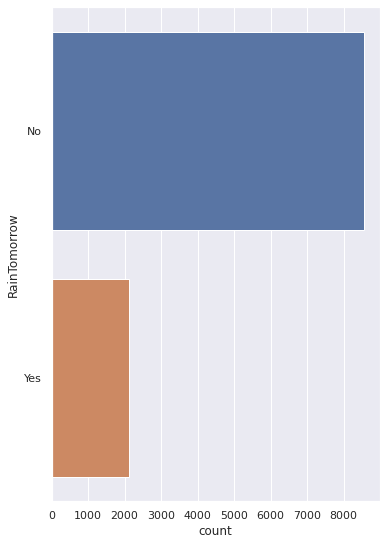

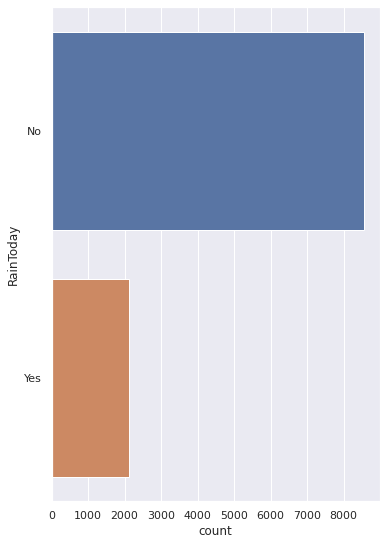

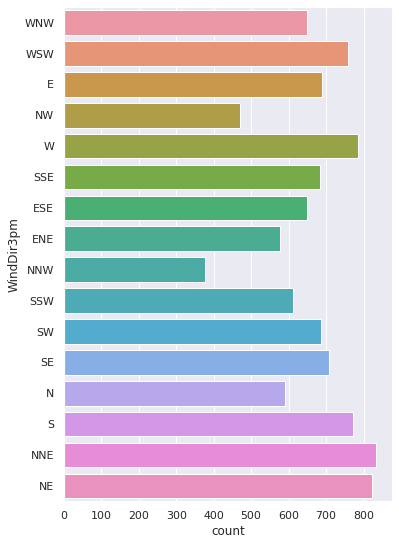

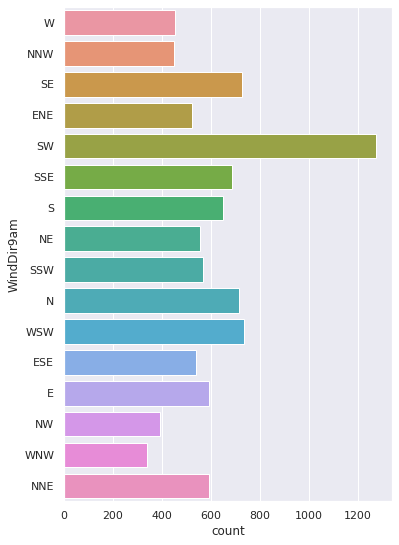

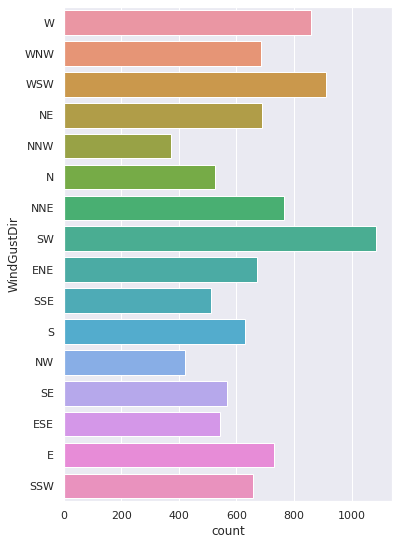

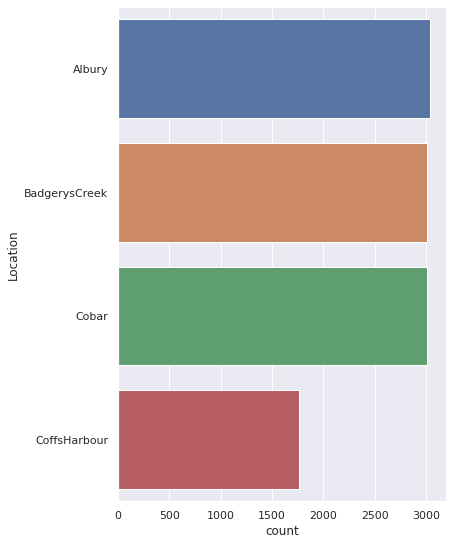

In [ ]:
#frequency plot for all categorical variables
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sb.countplot(y="RainTomorrow", data=df)
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(2,3,2)
sb.countplot(y="RainToday", data=df)
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(2,3,3)
sb.countplot(y="WindDir3pm", data=df)
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(2,3,4)
sb.countplot(y="WindDir9am", data=df)
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(2,3,5)
sb.countplot(y="WindGustDir", data=df)
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(2,3,6)
sb.countplot(y="Location", data=df)

plt.show()



In [ ]:

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


Text(0, 0.5, 'WindSpeed3pm')

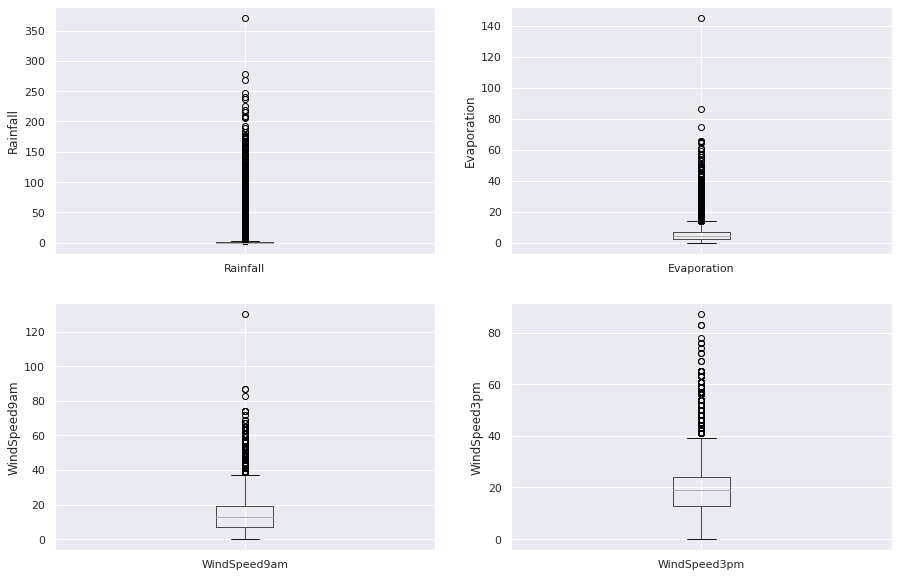

In [ ]:
#Boxplot to visualize the correlation
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [ ]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.399999999999999 or > 20.799999999999997
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


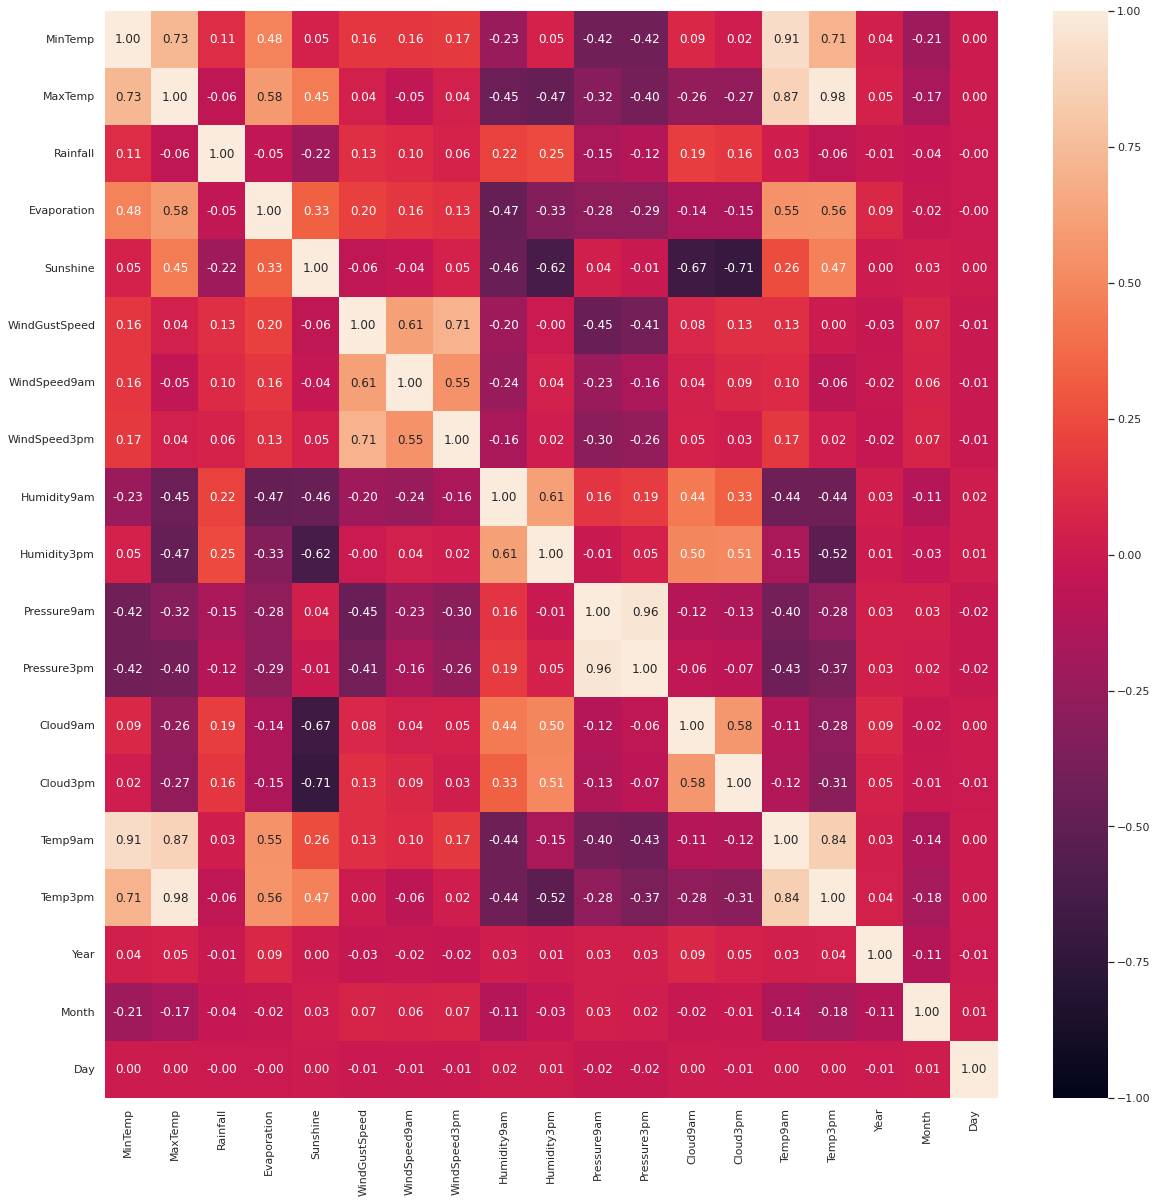

In [ ]:
#HEATMAP
corr = df.corr()
f = plt.figure(figsize=(20, 20))
sb.heatmap( corr, vmin=-1, vmax=1, fmt ='.2f', annot=True)

In [ ]:
#IMPUTING NULL VALUES
# FOR THE CATEGORICAL df, NULL VALUES ARE COMMONLY IMUTED USING MODE.
#FOR NUMERICAL DATA NULL VALUES ARE COMMONLY IMOUTED USING MEAN OR MEDIAN. Since THERE ARE OUTLIERS SHOWN
#IN THE BOXPLOT, WE WILL BE USING MEAN. 

In [ ]:

for col in numerical:
  col_median_df = df[col].median()

  df[col].fillna(col_median_df, inplace=True)  
      

In [ ]:
for col in categorical:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

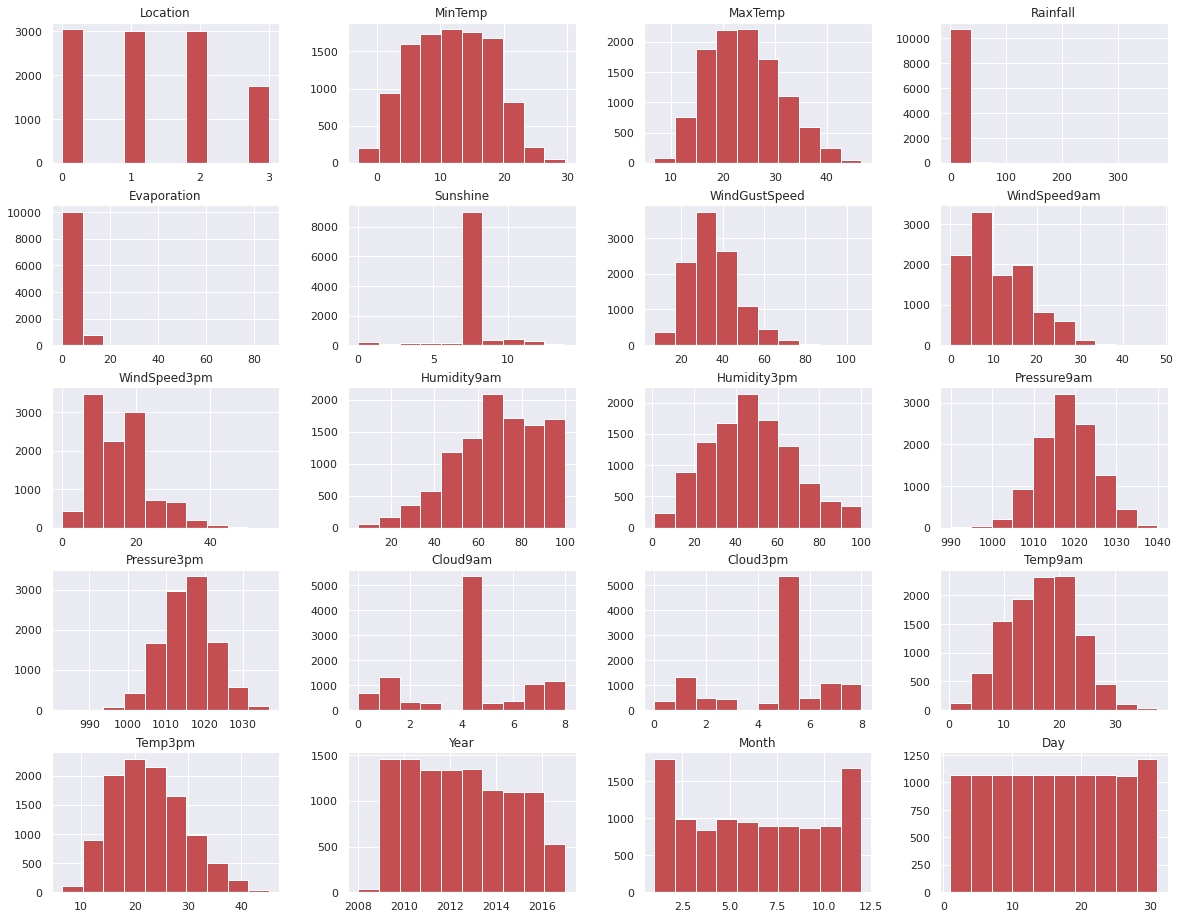

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(20,16), color = 'r');
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer


imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 =SimpleImputer(missing_values = np.nan, strategy = 'median')
df[['Evaporation']] = imputer2.fit_transform(df[['Evaporation']])
df[['Sunshine']] = imputer1.fit_transform(df[['Sunshine']])
df[['Cloud3pm']] = imputer2.fit_transform(df[['Cloud3pm']])
df[['Cloud9am']] = imputer1.fit_transform(df[['Cloud9am']])
#mean and median are same for Pressure9am and Pressure3pm
df[['Pressure9am']] = imputer1.fit_transform(df[['Pressure9am']])
df[['Pressure3pm']] = imputer1.fit_transform(df[['Pressure3pm']])


In [ ]:
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':    #Since we are encoding object dftype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [ ]:
zero  = df[df['RainTomorrow']==0]   #zero values in outcome column
one = df[df['RainTomorrow']==1]  # one values in outcome column
from sklearn.utils import resample
data_minority_upsampled = resample(one, replace = True, n_samples = 80537) 
#concatenate
dd = pd.concat([zero, data_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

In [ ]:
y = df['RainTomorrow']
x= df.drop('RainTomorrow', axis=1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
X_selected = fs.fit_transform(x, y)
print(X_selected.shape)
 

(10817, 15)


In [ ]:
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
7864,2,219,241,0,62,78,0,15,1,4,...,237,226,1,5,210,234,0,6,2,19
7004,2,83,146,0,38,78,13,9,5,13,...,307,287,0,1,131,151,0,3,8,12
395,0,236,252,0,36,78,3,20,1,4,...,187,163,5,1,263,241,0,1,11,30
4372,1,98,153,0,36,78,15,25,15,15,...,153,150,5,5,158,154,0,4,8,23
352,0,139,255,0,36,78,3,9,8,13,...,119,114,5,5,192,257,0,1,10,17


In [ ]:
# Apply label encoder to each column with categorical df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10817 entries, 7864 to 2868
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Location       10817 non-null  int64
 1   MinTemp        10817 non-null  int64
 2   MaxTemp        10817 non-null  int64
 3   Rainfall       10817 non-null  int64
 4   Evaporation    10817 non-null  int64
 5   Sunshine       10817 non-null  int64
 6   WindGustDir    10817 non-null  int64
 7   WindGustSpeed  10817 non-null  int64
 8   WindDir9am     10817 non-null  int64
 9   WindDir3pm     10817 non-null  int64
 10  WindSpeed9am   10817 non-null  int64
 11  WindSpeed3pm   10817 non-null  int64
 12  Humidity9am    10817 non-null  int64
 13  Humidity3pm    10817 non-null  int64
 14  Pressure9am    10817 non-null  int64
 15  Pressure3pm    10817 non-null  int64
 16  Cloud9am       10817 non-null  int64
 17  Cloud3pm       10817 non-null  int64
 18  Temp9am        10817 non-null  int64
 19  Te

In [ ]:
# capping outliers for numeric variables
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [x]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 20.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)
  


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn import ensemble
import xgboost as xgb

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
37478,30,0.3,14.3,3.2,2.2,10.3,12,28.0,1,13,...,1022.2,1020.3,8.0,4.0,3.8,13.8,1,2011,9,7
89655,6,23.1,31.2,2.4,12.4,11.2,9,65.0,9,9,...,1016.2,1012.6,2.0,1.0,28.3,30.5,1,2015,11,19
99562,16,9.7,33.7,0.0,7.2,13.4,13,43.0,3,12,...,1011.7,1009.3,2.0,1.0,23.0,32.5,0,2009,1,19
24070,21,17.1,22.8,3.2,4.4,8.1,12,41.0,1,8,...,1008.4,1005.9,8.0,2.0,18.8,21.1,1,2017,4,29
91467,11,15.8,25.6,0.0,4.4,8.1,5,28.0,7,4,...,1022.6,1018.0,6.0,5.0,21.5,23.9,0,2012,5,11


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)


In [ ]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
8411,2,5.4,21.8,0.0,7.6,7.72014,9,26.0,10,11,...,1026.0,1022.5,4.200459,1.0,13.9,20.7,0,2015,9,18
4863,1,16.4,23.4,3.2,4.4,7.72014,3,19.0,13,6,...,1016.9,1013.7,4.200459,5.0,18.0,22.0,1,2014,3,28
5071,1,12.8,24.5,0.0,4.4,7.72014,5,33.0,6,5,...,1026.8,1021.0,4.200459,5.0,17.2,23.2,0,2014,10,22
5763,1,12.4,20.0,0.0,4.4,7.72014,15,15.0,12,7,...,1021.4,1017.9,4.200459,5.0,16.3,19.4,0,2016,9,13
4668,1,11.7,22.8,3.2,4.4,7.72014,10,37.0,15,8,...,1011.8,1008.8,4.200459,5.0,15.2,21.3,1,2013,9,14


In [ ]:
# We will be using four different machine learning models and compare its accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import xgboost as xgb



LOGISTIC REGESSION

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score,classification_report ,plot_confusion_matrix

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
log_reg.score(x_test, y_test)

0.8784658040665434

In [ ]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
log_para_grid = [{
   
    'C': np.logspace(-4,4,20),
    'penalty': ['l1','l2','elasticnet','none']
}]
    

In [ ]:
clf_logreg = GridSearchCV(log_reg, param_grid = log_para_grid, cv = 3, verbose = True)

In [ ]:
 clf_logreg.fit(x_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2', 'elasticnet', 'none']}],
             verbose=True)

In [ ]:
 clf_logreg.best_estimator_.get_params()

{'C': 0.0006951927961775605,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
improved_log_reg = LogisticRegression(C= .0006951927961775605,
 class_weight= None,
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'auto',
 n_jobs= None,
 penalty= 'l2',
 random_state= None,
 solver= 'lbfgs',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)

In [ ]:
improved_log_reg.fit(x_train, y_train)

LogisticRegression(C=0.0006951927961775605)

In [ ]:
pre1 = improved_log_reg.predict(x_test)

In [ ]:
improved_log_reg.score(x_test, y_test)

0.8798521256931608

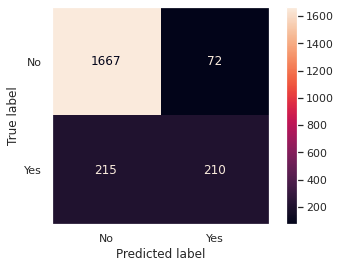

In [ ]:
plot_confusion_matrix(improved_log_reg,x_test,y_test, cmap = None )
plt.grid(False)

XGBOOST CLASSIFIER

In [ ]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(x_train,y_train)

XGBClassifier()

In [ ]:
xgb_model.score(x_test, y_test)

0.8821626617375231

In [ ]:
params = { 'max_depth': np.arange(2, 30, 1),
           'learning_rate': np.arange(0.01, 0.1, 0.01),
           'colsample_bytree': np.arange(0.1, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.1, 1.0, 0.1),
          'subsample': np.arange(0.1, 1.0, 0.1),
          'reg_lambda' : np.arange(0,2.0,0.1),
          'reg_alpha': np.arange(0,2.0,0.1),
         'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
          'n_estimators': np.arange(10, 1000, 10),
          'min_child_weight' :np.arange(0, 100, 5)}


In [ ]:
clf = RandomizedSearchCV(estimator=xgb_model,
                         param_distributions=params,
                      scoring='roc_auc',
                         n_iter=25,
                         verbose=3,cv=5,n_jobs=-1
                        
                        )
# This cell creates an instance for th

In [ ]:
clf.fit(x_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7...
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990]),
                                        'reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                        'reg_lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,

In [ ]:
clf.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 0.30000000000000004,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0.0,
 'learning_rate': 0.06999999999999999,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 550,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 1.1,
 'reg_lambda': 0.8,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.8,
 'verbosity': 1}

In [ ]:

improved_xgb = xgb.XGBClassifier(base_score= 0.5,
 booster='gbtree',
 colsample_bylevel= 0.7000000000000001,
 colsample_bynode= 1,
 colsample_bytree=0.8,
 gamma= 0.2,
 learning_rate= 0.03,
 max_delta_step= 0,
 max_depth=19,
 min_child_weight= 35,
 missing= None,
 n_estimators= 990,
 n_jobs= 1,
 nthread= None,
 objective='binary:logistic',
 random_state= 0,
 reg_alpha=  1.7000000000000002,
 reg_lambda= 0.7000000000000001,
 scale_pos_weight= 1,
 seed= None,
 silent= None,
 subsample= 0.9,
 verbosity= 1) 

In [ ]:
improved_xgb.fit(x_train, y_train)
pre2=improved_xgb.predict(x_test)
improved_xgb_score=accuracy_score(y_test,pre2)




<Figure size 3600x3600 with 0 Axes>

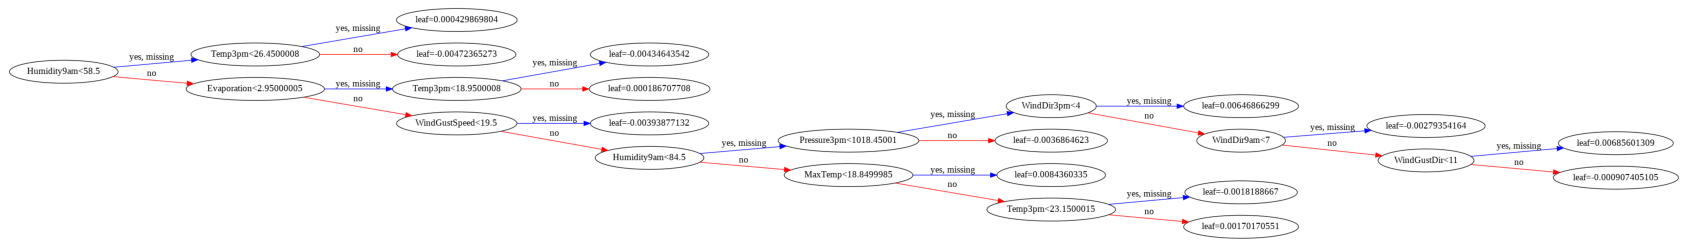

In [ ]:
from xgboost import plot_tree
plt.figure(figsize=(50,50))
plot_tree(improved_xgb,rankdir='LR',num_trees=-1)
plt.gcf().set_size_inches(30, 30)

plt.show()

In [ ]:
improved_xgb_score

0.8863216266173752

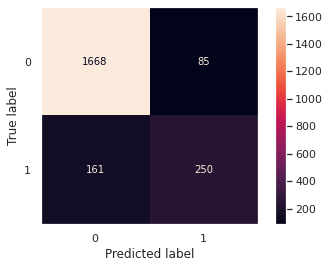

In [ ]:
plot_confusion_matrix(improved_xgb,x_test,y_test, cmap = None )
plt.grid(False)

DECISION TREE

In [ ]:
dec_tree = DecisionTreeClassifier( )

In [ ]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dec_tree.score(x_test, y_test)

0.8170055452865065

In [ ]:
dcpara_grid = { 
                'criterion': ['gini', 'entropy'],
               'max_depth': [1,2,3,4,5,6,7, None],
            
    
}

# criterion and max_depth are the only two parameters that show change in accuracy when varied. 
# Therefore, we only tune these.
 

In [ ]:
dectree_param_finder = GridSearchCV(dec_tree, param_grid = dcpara_grid, cv =10, n_jobs = -1)
dectree_param_finder.fit(x_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [ ]:
dectree_param_finder.best_estimator_.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
improved_dectree = DecisionTreeClassifier(ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'entropy',
 max_depth= 6,
 max_features=None,
 max_leaf_nodes=None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split=2,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter= 'best')

In [ ]:
improved_dectree.fit(x_train, y_train)
pre3 = improved_dectree.predict(x_test)
improved_dectree.score(x_test, y_test)


0.8664510166358595

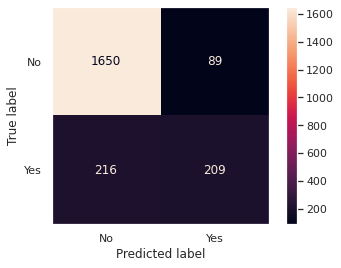

In [ ]:
plot_confusion_matrix(improved_dectree,x_test,y_test, cmap = None )
plt.grid(False)


RANDOM FOREST

In [ ]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
rc.score(x_test, y_test)


0.8687615526802218

In [ ]:
Classifier = ensemble.RandomForestClassifier(n_jobs =-1)
params = {'n_estimators':np.arange(100, 1500, 100),
          'max_depth': np.arange(1,20),
          'criterion': ['gini', 'entropy']

          }
# n_jobs: Conveys to the engine how many processors are allowed to use. 
# If the value is 1, it can use only one processor, but if the value is -1,, there is no limit.

# max_depth refers to the range to let the model know how many layers are there in a decision tree


In [ ]:
from sklearn import model_selection
model = model_selection.RandomizedSearchCV( estimator = Classifier,
                                     param_distributions = params,
                                     n_iter = 10,
                                     scoring = 'accuracy',
                                     verbose = 10,
                                     cv = 5,
                                     n_jobs =1)

#classifier - 

In [ ]:
# Do Not RUN THIS CELL, it takes a lot of time
model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=4, n_estimators=900..............
[CV 1/5; 1/10] END criterion=gini, max_depth=4, n_estimators=900;, score=0.858 total time=   5.9s
[CV 2/5; 1/10] START criterion=gini, max_depth=4, n_estimators=900..............
[CV 2/5; 1/10] END criterion=gini, max_depth=4, n_estimators=900;, score=0.860 total time=   4.5s
[CV 3/5; 1/10] START criterion=gini, max_depth=4, n_estimators=900..............
[CV 3/5; 1/10] END criterion=gini, max_depth=4, n_estimators=900;, score=0.847 total time=   6.0s
[CV 4/5; 1/10] START criterion=gini, max_depth=4, n_estimators=900..............
[CV 4/5; 1/10] END criterion=gini, max_depth=4, n_estimators=900;, score=0.851 total time=   4.8s
[CV 5/5; 1/10] START criterion=gini, max_depth=4, n_estimators=900..............
[CV 5/5; 1/10] END criterion=gini, max_depth=4, n_estimators=900;, score=0.857 total time=   6.1s
[CV 1/5; 2/10] START criterion=entropy, max_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400])},
                   scoring='accuracy', verbose=10)

In [ ]:
model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 900,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rc_improved = RandomForestClassifier(bootstrap= True, ccp_alpha= 0.0, class_weight= None, criterion= 'gini', 
max_depth=13, max_features='auto', max_leaf_nodes= None, max_samples= None,
 min_impurity_decrease= 0.0, min_samples_leaf= 1, min_samples_split= 2,
  min_weight_fraction_leaf=0.0, n_estimators=1300, n_jobs= -1, 
oob_score= False, random_state= None, verbose= 0, warm_start= False)


In [ ]:
rc_improved.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=1300, n_jobs=-1)

In [ ]:
pre4= rc_improved.predict(x_test)

In [ ]:
rc_improved.score(x_test, y_test)

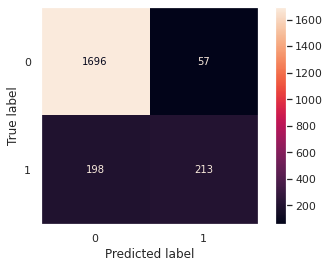

In [ ]:
plot_confusion_matrix(rc_improved,x_test,y_test, cmap = None )
plt.grid(False)


In [ ]:
model_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost Classifier', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, pre1), accuracy_score(y_test, pre2), accuracy_score(y_test, pre3), accuracy_score(y_test, pre4)],

    

})

In [ ]:
model_summary

,Model,Accuracy
0,Logistic Regression,0.879852
1,XGBoost Classifier,0.886322
2,Decision Tree,0.866451
3,Random Forest,0.882163
